# Datala Analysis - AJAX

## Introduction

Currently, sports are heavily surrounded by data, both in terms of performance and business. We are going to seize this moment and these technologies to delve into the management of a team such as Ajax in order to make decisions that add value to the club.

### Main goal

We would like to know which player we should sign, considering that we would want to acquire a young player with great potential at a good price.

### Secondary objetives

- Explore the data we have to identify potential relationships between variables.
- Group the player types to better visualize important characteristics among them.
- Examine if age correlates with the variables we've identified as important for our study.
- Find a way to select the best player.

## Exploratory

### Libraries and Data Ingestion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.read_csv('Fifa 23 Players Data.csv')
pd.set_option('display.max_columns', None)

In [3]:
fifa = pd.read_csv('Fifa 23 Players Data.csv')

# The column names have some signs that we have to clean

fifa.columns = [col.strip() for col in fifa.columns]
fifa.columns = fifa.columns.str.replace(' ', '_')

In [4]:
fifa2 = fifa.copy()
column_names = fifa2.columns
fifa2.head(5)

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,Height(in_cm),Weight(in_kg),TotalStats,BaseStats,Club_Name,Wage(in_Euro),Release_Clause,Club_Position,Contract_Until,Club_Jersey_Number,Joined_On,On_Loan,Preferred_Foot,Weak_Foot_Rating,Skill_Moves,International_Reputation,National_Team_Name,National_Team_Image_Link,National_Team_Position,National_Team_Jersey_Number,Attacking_Work_Rate,Defensive_Work_Rate,Pace_Total,Shooting_Total,Passing_Total,Dribbling_Total,Defending_Total,Physicality_Total,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,LongPassing,BallControl,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,ST_Rating,LW_Rating,LF_Rating,CF_Rating,RF_Rating,RW_Rating,CAM_Rating,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


### General analysis of the information

We would like to analyze the different characteristics for player types. To do this, we will create a new column where we will group the different positions into more general categories of player types and see which skills they excel in.

In [13]:
# There are significant outliers in players over 40 year old ,so let's remove them
fifa2 = fifa2[fifa2['Age'] <= 40]

# I want to separate players by main positions and create a new column

position_mapping = {
    'LWB': 'Defense',
    'LB': 'Defense',
    'CB': 'Defense',
    'RB': 'Defense',
    'RWB': 'Defense',
    'Center_CDM': 'Midfield',
    'CM': 'Midfield',
    'LM': 'Midfield',
    'RM': 'Midfield',
    'CAM': 'Midfield',
    'GK': 'Goalkeeper',
    'LW': 'Attack',
    'LF': 'Attack',
    'CF': 'Attack',
    'RF': 'Attack',
    'RW': 'Attack',
    'ST': 'Attack'
}

# Function to assign the category to each position
def assign_category(position):
    return position_mapping.get(position, 'Other')

# Apply the function to create a new column 'Position_Category'
fifa2['Position_Category'] = fifa2['Best_Position'].apply(assign_category)


In [19]:
# these are the features that we want to examine for each position
features_position = ['Crossing','Finishing','Heading_Accuracy','Short_Passing','Volleys','Dribbling','Curve','Freekick_Accuracy',
       'LongPassing','BallControl','Acceleration','Sprint_Speed','Agility','Reactions','Balance','Shot_Power','Jumping',
       'Stamina','Strength','Long_Shots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
       'Marking','Standing_Tackle','Sliding_Tackle']

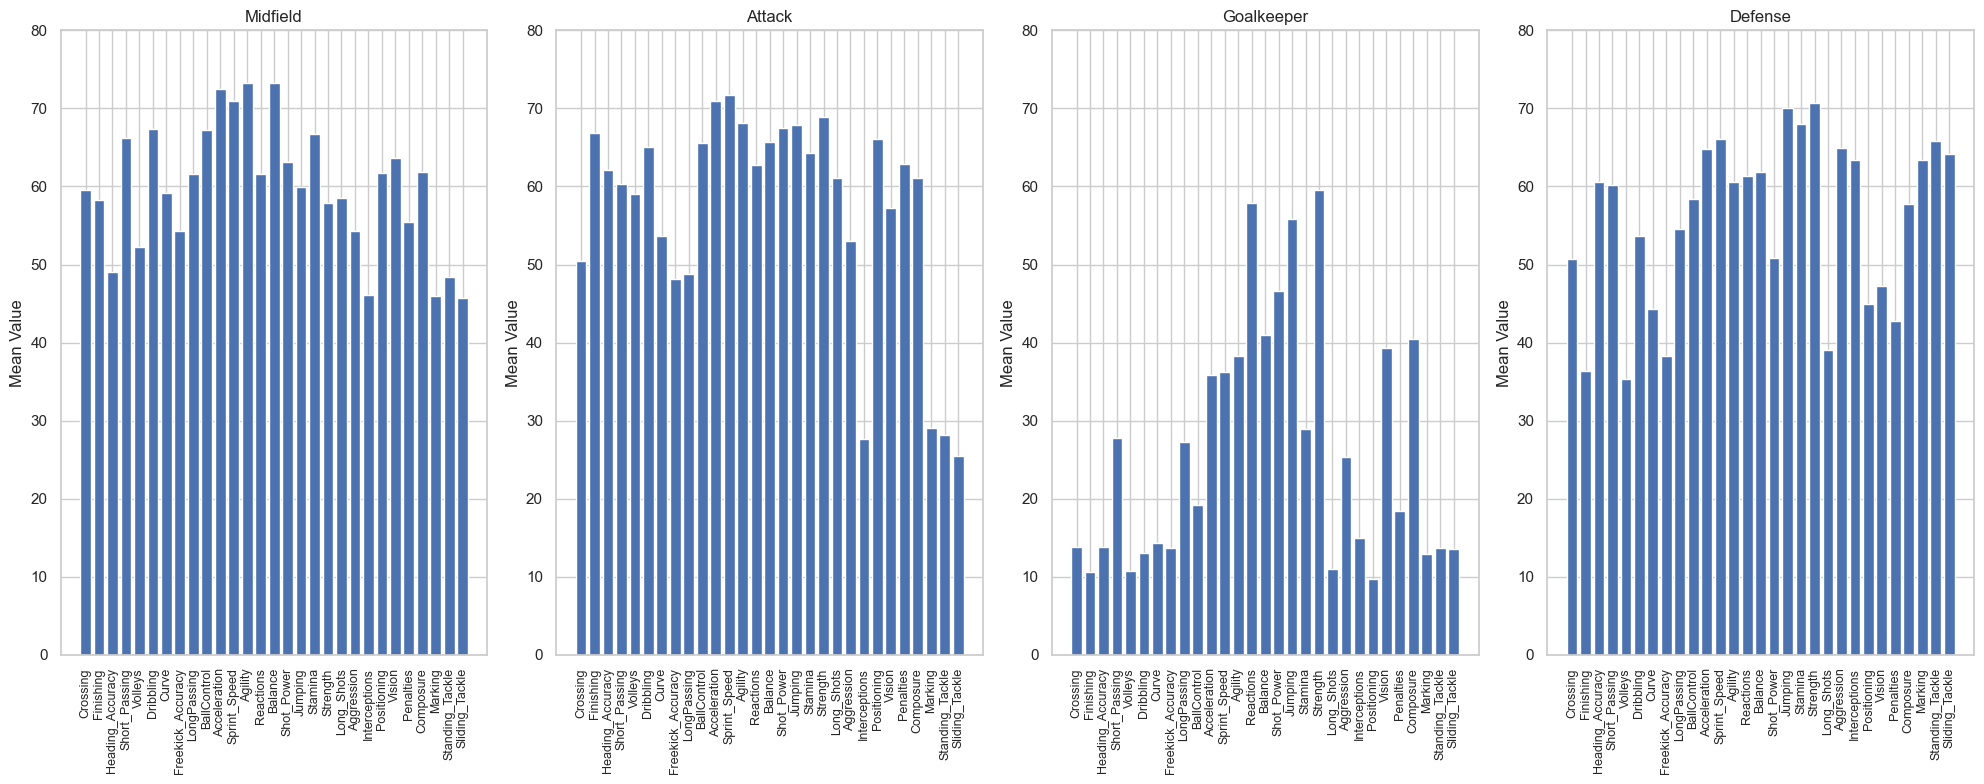

In [37]:
# This is de code for this porpose
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

position_categories = fifa2['Position_Category'].unique()[:4]

for idx, position in enumerate(position_categories):
    ax = axes[idx]
    subset = fifa2[fifa2['Position_Category'] == position]
    means = subset[features_position].mean()
    ax.bar(features_position, means)
    ax.set_title(f'{position}')
    ax.set_xticks(range(len(features_position)))  
    ax.set_xticklabels(features_position, rotation=90, fontsize=9)  
    ax.set_ylabel('Mean Value')
    ax.set_ylim(0, 80) 

plt.tight_layout()
plt.show()

Using these plots, we can appreciate the average primary characteristics of each player type. Given that we are focusing on replacing a defender, we will emphasize that the three most important characteristics for them are **stamina, jumping,** and **strength**.

### Correlation among numeric columns

We would like to see how the numeric columns correlate with each other to check if they provide relevant information.

In [63]:
# We drop all the columns that are addinf info that we don't need for the next analysis

columns_to_drop = ['Known_As', 'Image_Link','Height(in_cm)', 'Weight(in_kg)', 'TotalStats', 'BaseStats',
       'Club_Position', 'Club_Jersey_Number', 'Joined_On', 'On_Loan','Preferred_Foot', 'Weak_Foot_Rating',
       'International_Reputation', 'National_Team_Name','National_Team_Image_Link','National_Team_Jersey_Number',
       'Crossing','Finishing','Heading_Accuracy','Short_Passing','Volleys','Dribbling','Curve','Freekick_Accuracy',
       'LongPassing','BallControl','Acceleration','Sprint_Speed','Agility','Reactions','Balance','Shot_Power','Jumping',
       'Stamina','Strength','Long_Shots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
       'Marking','Standing_Tackle','Sliding_Tackle','Goalkeeper_Diving','Goalkeeper_Handling','GoalkeeperKicking',
       'Goalkeeper_Positioning','Goalkeeper_Reflexes','ST_Rating','LW_Rating','LF_Rating','CF_Rating','RF_Rating',
       'RW_Rating','CAM_Rating','LM_Rating','CM_Rating','RM_Rating','LWB_Rating','CDM_Rating','RWB_Rating','LB_Rating',
       'CB_Rating','RB_Rating','GK_Rating','Contract_Until', 'Skill_Moves',
       'National_Team_Position', 'Attacking_Work_Rate', 'Defensive_Work_Rate',
       'Pace_Total', 'Shooting_Total', 'Passing_Total', 'Dribbling_Total']

fifa_cleaned = fifa2.drop(columns = columns_to_drop)

# Save cleaned data for future use
fifa_cleaned.to_csv('fifa_cleaned.csv')

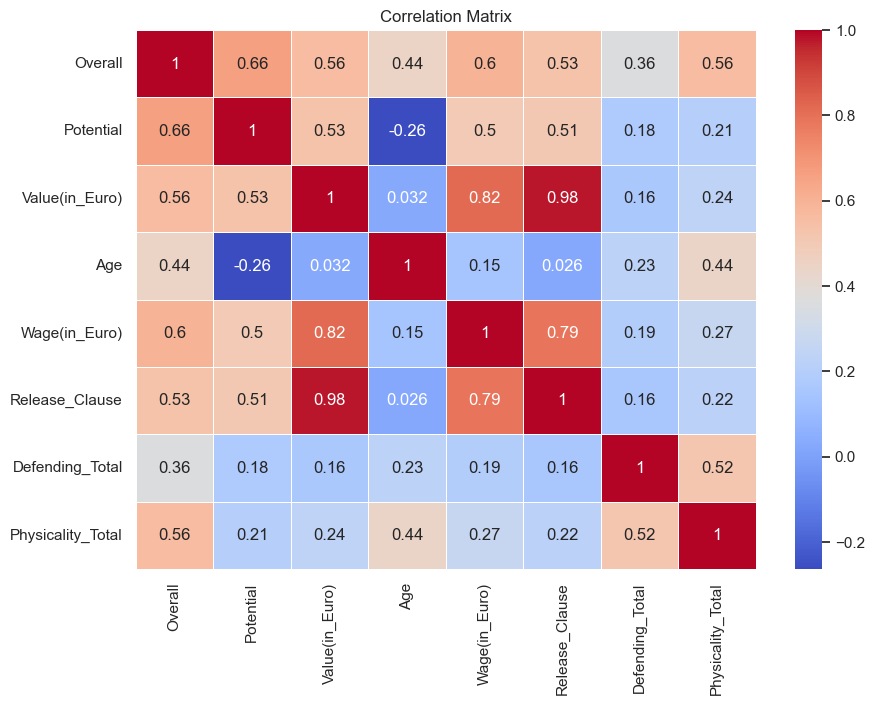

In [42]:
fifa_num_cor = fifa_cleaned.select_dtypes(include = [np.number])
correlation_matrix = fifa_num_cor.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
      


We can find a strong correlation between **Potential, Overall, Value, Wage,** and **Release Clause**. On the other hand, we observe that **age** correlates well with **Overall** and **Physicality**.

### Analysis by age: Potential, Value and Overall

We consider it important to perform an analysis by age, as we would like to sign a young player who can give us his best years.

In [46]:
# Let's take a look over these aspects

grouped_age = fifa2.groupby('Age').agg({'Potential': 'mean', 'Value(in_Euro)': 'mean', 'Overall': 'mean', 'Release_Clause':'mean'})

top_3_potential_byage = grouped_age.sort_values(by='Potential', ascending=False).head(3)

top_3_potential_byage

,Potential,Value(in_Euro),Overall,Release_Clause
Age,,,,
17,74.373494,692570.281124,56.381526,1.650398e+06
18,73.984026,754201.277955,58.070288,1.586059e+06
16,73.806452,378064.516129,54.548387,8.887419e+05


We will use graphics to see the relationship between Age and these variables: Value, Overall, and Clause.

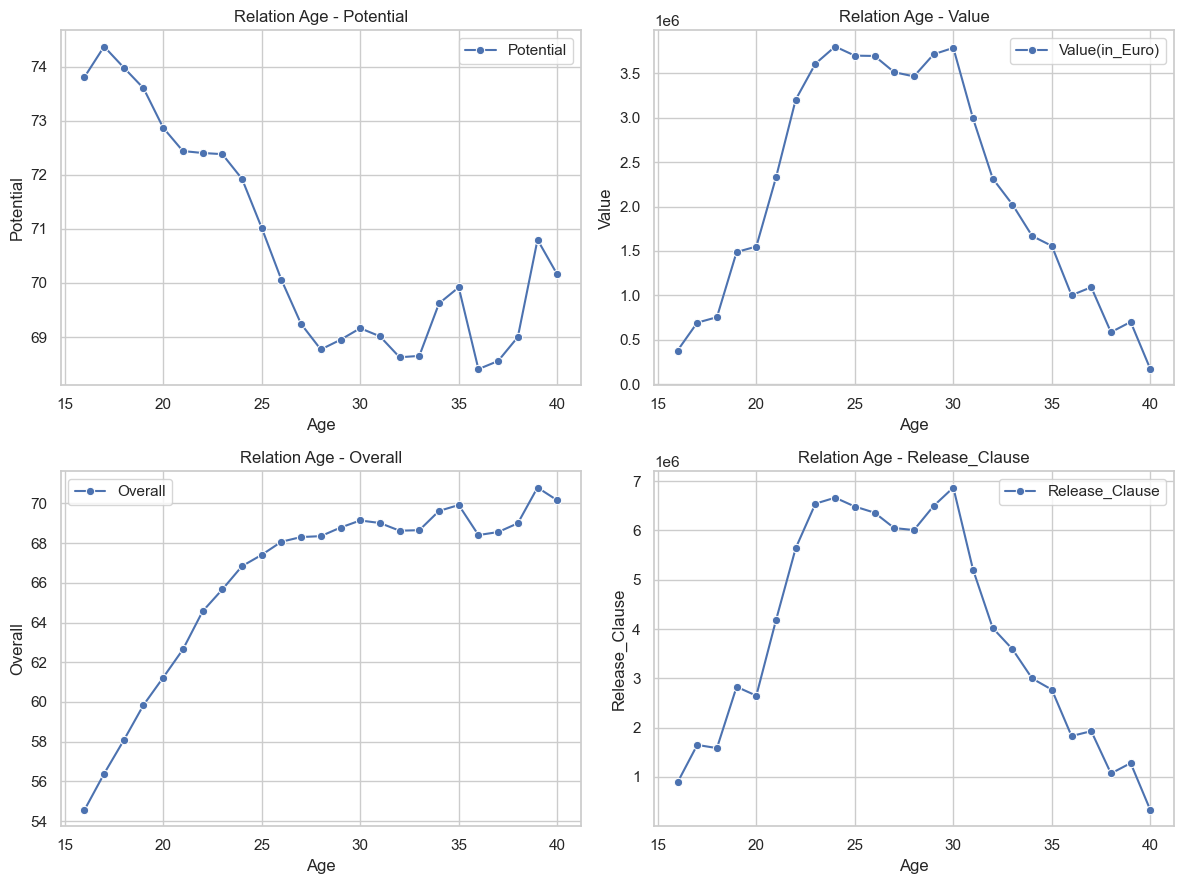

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

sns.lineplot(data=grouped_age, x='Age', y='Potential', label='Potential', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Relation Age - Potential')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Potential')

sns.lineplot(data=grouped_age, x='Age', y='Value(in_Euro)', label='Value(in_Euro)', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Relation Age - Value')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Value')

sns.lineplot(data=grouped_age, x='Age', y='Overall', label='Overall', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Relation Age - Overall')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Overall')

sns.lineplot(data=grouped_age, x='Age', y='Release_Clause', label='Release_Clause', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Relation Age - Release_Clause')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Release_Clause')

plt.tight_layout()
plt.show()

- **Age - Potential:** The trend is to have very high potential when you are young, from 16 to 20 years old, and it decreases once your value as a player consolidates.
- **Age - Value:** The value grows significantly from the ages of 16 to 25, with a period of relative stability until the age of 30, at which point it plummets.
- **Age - Overall:** It grows almost exponentially and continues until the end of their professional career.
- **Age - Release Clause:** It has a low price until the age of 20 and experiences a significant increase until the age of 23 when it stabilizes until reaching the age of 30, at which point this price decreases.

We find interesting to analyze this data for each of the player groups: goalkeepers, forwards, defenders, and midfielders.

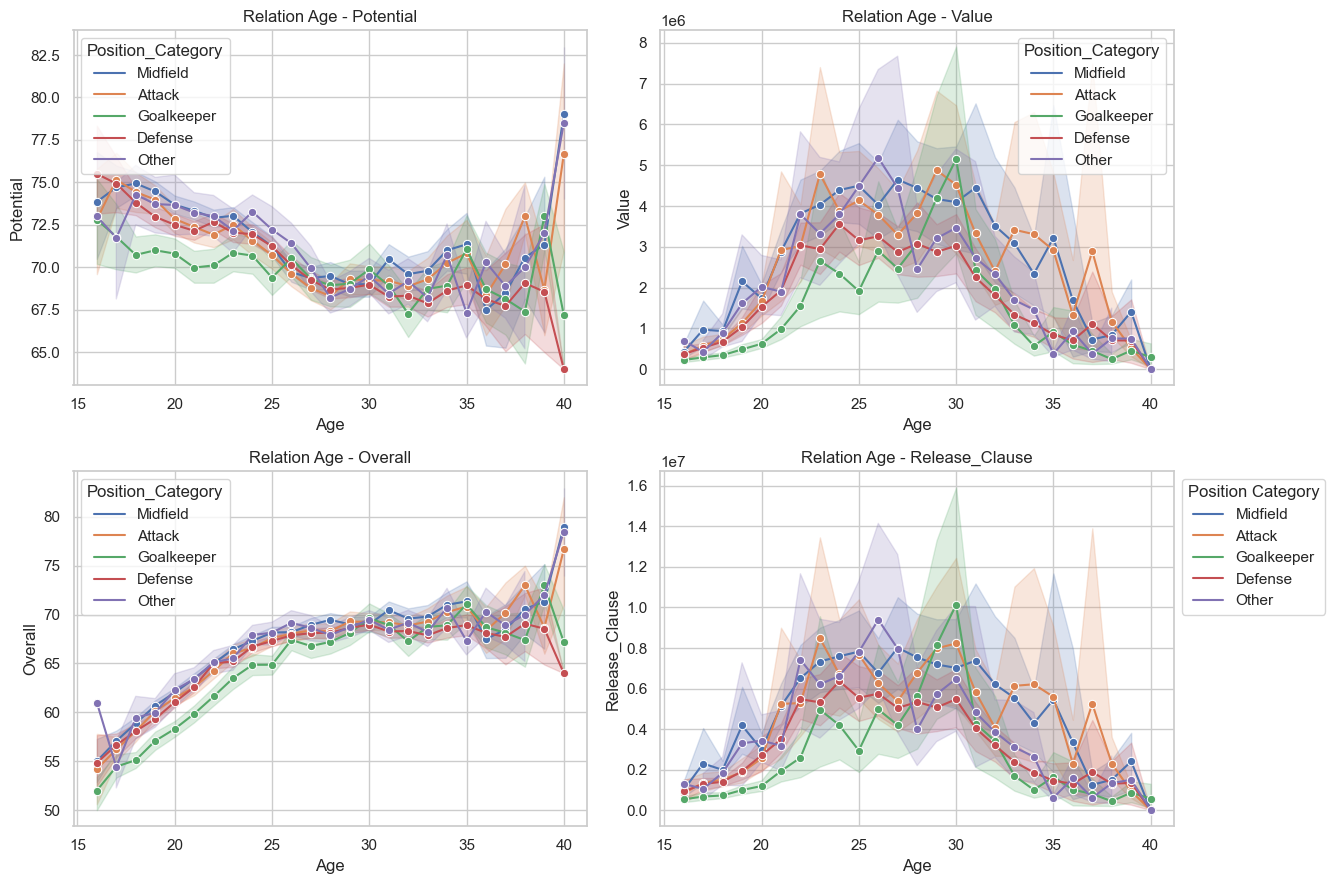

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

sns.lineplot(data=fifa2, x='Age', y='Potential', hue='Position_Category', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Relation Age - Potential')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Potential')

sns.lineplot(data=fifa2, x='Age', y='Value(in_Euro)', hue='Position_Category', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Relation Age - Value')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Value')

sns.lineplot(data=fifa2, x='Age', y='Overall', hue='Position_Category', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Relation Age - Overall')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Overall')

sns.lineplot(data=fifa2, x='Age', y='Release_Clause', hue='Position_Category', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Relation Age - Release_Clause')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Release_Clause')

plt.tight_layout()
plt.legend(title='Position Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Despite not differing much from each other in terms of the position group they belong to, we can clearly see that:

- Their **potential** is slightly lower than that of the others, especially at older ages.
- Their **value** is also lower throughout their careers, except for goalkeepers, which are below, although they clearly surpass others at the peak, which occurs at the age of 30.
- The **overall** does not show significant differences.
- The **release clause** tends to be below that of the others, but at the age of 30, it spikes and surpasses the average of the other positions.

In [48]:
# Correlation between Age and Potential
cor_age_pot = fifa3['Age'].corr(fifa3['Potential'])
cor_age_pot

-0.2638692227488566

In [49]:
# Correlation between Age and Value
cor_age_val = fifa3['Age'].corr(fifa3['Value(in_Euro)'])
cor_age_val

0.031621740957541694

In [50]:
# Correlation between Age and Overall
cor_age_ovr = fifa3['Age'].corr(fifa3['Overall'])
cor_age_ovr

0.44340267056657345

We can see that most interesting players to adquire are those between 18 an 21 year old, so they still have a low release clause, and their value and overall tend to increase. Besides, they still have a huge potential.

The correlation between Age and Potential is negative, so the more time past, the less potential they have. In the other hand, there is a positive correlation with Overall results. The correlation with value doesn't say anything, probably because there is a bell shape for this data.

## Prediction of Value based on Age for CB players

Let's create a predictive model that tells us, based on the player's age, assuming they play in a defensive position, and their three main characteristics have values above 60, what their value will be.

In [52]:
from sklearn.linear_model import LinearRegression

#let's create a new df where we select only Defense players with an Overall over 80
fifa_cb = fifa2[(fifa2['Position_Category'] == 'Defense') & (fifa2['Overall'] > 80)& (fifa2['Stamina'] > 60)& (fifa2['Strength'] > 60)& (fifa2['Jumping'] > 60)]

x_age = fifa_cb['Age'].values  
y_value = fifa_cb['Value(in_Euro)'].values 
model = LinearRegression()

x_age = x_age.reshape(-1, 1) 
y_value = y_value.reshape(-1, 1)  

model.fit(x_age, y_value)

# These are the ages where I want to predict the value
x_new_values = [16, 18, 20, 22, 35]  

for x_new in x_new_values:
    y_pred = model.predict([[x_new]])
    print(f"The value predicted for a CB player with {x_new}yo is {y_pred[0][0]:.2f}€")


The value predicted for a CB player with 16yo is 70582190.47€
The value predicted for a CB player with 18yo is 64990204.27€
The value predicted for a CB player with 20yo is 59398218.07€
The value predicted for a CB player with 22yo is 53806231.86€
The value predicted for a CB player with 35yo is 17458321.53€


### AJAX Exploration

Now, let's do an exploration of our own current team, AJAX.

### Our team

In [55]:
ajax = fifa2[fifa2['Club_Name'] == 'Ajax']
ajax.head(30)

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,Height(in_cm),Weight(in_kg),TotalStats,BaseStats,Club_Name,Wage(in_Euro),Release_Clause,Club_Position,Contract_Until,Club_Jersey_Number,Joined_On,On_Loan,Preferred_Foot,Weak_Foot_Rating,Skill_Moves,International_Reputation,National_Team_Name,National_Team_Image_Link,National_Team_Position,National_Team_Jersey_Number,Attacking_Work_Rate,Defensive_Work_Rate,Pace_Total,Shooting_Total,Passing_Total,Dribbling_Total,Defending_Total,Physicality_Total,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,LongPassing,BallControl,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,ST_Rating,LW_Rating,LF_Rating,CF_Rating,RF_Rating,RW_Rating,CAM_Rating,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating,Position_Category
97,D. Tadić,Dušan Tadić,84,84,26500000,"LW,CF,CAM",LW,Serbia,https://cdn.sofifa.net/players/199/434/23_60.png,33,181,76,2106,439,Ajax,32000,37100000,RW,2024,10,2018,-,Left,3,4,3,-,-,-,-,Medium,Medium,68,81,86,84,43,77,88,83,66,87,80,84,85,79,80,87,68,68,73,84,84,79,59,88,81,77,56,41,85,88,84,87,51,34,26,11,11,14,9,16,83,83,83,83,83,83,84,84,83,84,69,68,69,64,58,64,23,Attack
272,S. Berghuis,Steven Berghuis,82,82,29500000,"CAM,RW",CAM,Netherlands,https://cdn.sofifa.net/players/200/260/23_60.png,30,182,75,2065,436,Ajax,25000,41300000,CM,2025,23,2021,-,Left,3,4,3,Netherlands,https://cdn.sofifa.net/flags/nl.png,CM,11,High,Medium,80,82,83,82,40,69,85,82,48,83,77,80,86,76,82,85,83,78,84,80,75,82,55,80,63,84,72,37,82,83,83,81,44,37,30,9,11,7,7,15,81,82,81,81,81,82,82,82,81,82,68,66,68,63,54,63,21,Midfield
346,L. Ocampos,Lucas Ocampos,81,81,27500000,"RW,LW",RW,Argentina,https://cdn.sofifa.net/players/205/632/23_60.png,27,188,84,2188,465,Ajax,39000,0,SUB,2023,11,2019,TRUE,Right,3,4,2,-,https://cdn.sofifa.net/flags/ar.png,-,-,High,High,80,81,77,82,62,83,78,81,77,80,81,85,80,65,72,83,80,80,78,81,61,83,80,90,81,78,81,71,82,78,79,81,58,57,55,11,8,15,12,7,81,81,81,81,81,81,81,81,81,81,76,75,76,74,71,74,20,Attack
396,E. Álvarez,Edson Álvarez,80,84,27500000,"CDM,CM",CB,Mexico,https://cdn.sofifa.net/players/235/844/23_60.png,24,187,73,1979,432,Ajax,17000,40600000,CDM,2025,4,2019,-,Right,3,2,2,Mexico,https://cdn.sofifa.net/flags/mx.png,CDM,4,Low,High,71,57,67,69,82,86,64,57,81,76,63,68,42,40,72,71,69,73,60,76,68,70,78,87,86,40,86,83,56,63,65,72,84,81,79,7,11,10,7,6,70,66,66,66,66,66,68,71,73,71,79,81,79,80,83,80,17,Defense
405,J. Timber,Jurriën Timber,80,88,44500000,"CB,RB",CB,Netherlands,https://cdn.sofifa.net/players/251/805/23_60.png,21,179,77,1950,435,Ajax,14000,71200000,CB,2025,2,2019,-,Right,3,3,2,Netherlands,https://cdn.sofifa.net/flags/nl.png,SUB,2,High,Medium,82,47,67,77,81,81,60,41,71,80,41,76,44,31,70,78,80,83,73,78,74,58,85,81,82,46,76,82,63,64,42,85,83,83,77,6,6,8,14,14,67,69,69,69,69,69,72,74,75,74,80,81,80,80,82,80,19,Defense
462,D. Blind,Daley Blind,80,80,13500000,"CB,LB,CDM",CDM,Netherlands,https://cdn.sofifa.net/players/190/815/23_60.png,32,180,72,2069,416,Ajax,20000,18900000,LB,2023,17,2018,-,Left,3,3,3,Netherlands,https://cdn.sofifa.net/flags/nl.png,LWB,17,Medium,Medium,42,62,82,79,81,70,80,56,76,85,66,77,84,62,84,83,45,40,71,82,72,74,77,73,71,64,64,85,66,82,54,83,81,80,80,12,9,10,14,10,72,71,72,72,72,71,78,76,80,76,80,80,80,79,80,79,22,Other
481,S. Bergwijn,Steven Bergwijn,80,85,32000000,"LW,RW",CAM,Netherlands,https://cdn.sofifa.net/players/225/953/23_60.png,24,178,78,2036,434,Ajax,21000,47200000,LW,2027,7,2022,-,Right,2,4,3,Netherlands,https://cdn.sofifa.net/flags/nl.png,ST,7,High,Medium,86,78,75,83,42,70,76,76,60,79,76,84,79,65,64,82,87,85,79,79,89,84,69,72,75,80,54,34,78,78,6

Now let's see the mean of age, overall and value

In [57]:
print('Mean age:', ajax['Age'].mean())
print('Mean Overall:', ajax['Overall'].mean())
print('Mean Value(in Euro):', ajax['Value(in_Euro)'].mean())

Mean age: 23.62962962962963
Mean Overall: 74.37037037037037
Mean Value(in Euro): 13136111.111111112


### Graphical representation of the relationship between variables

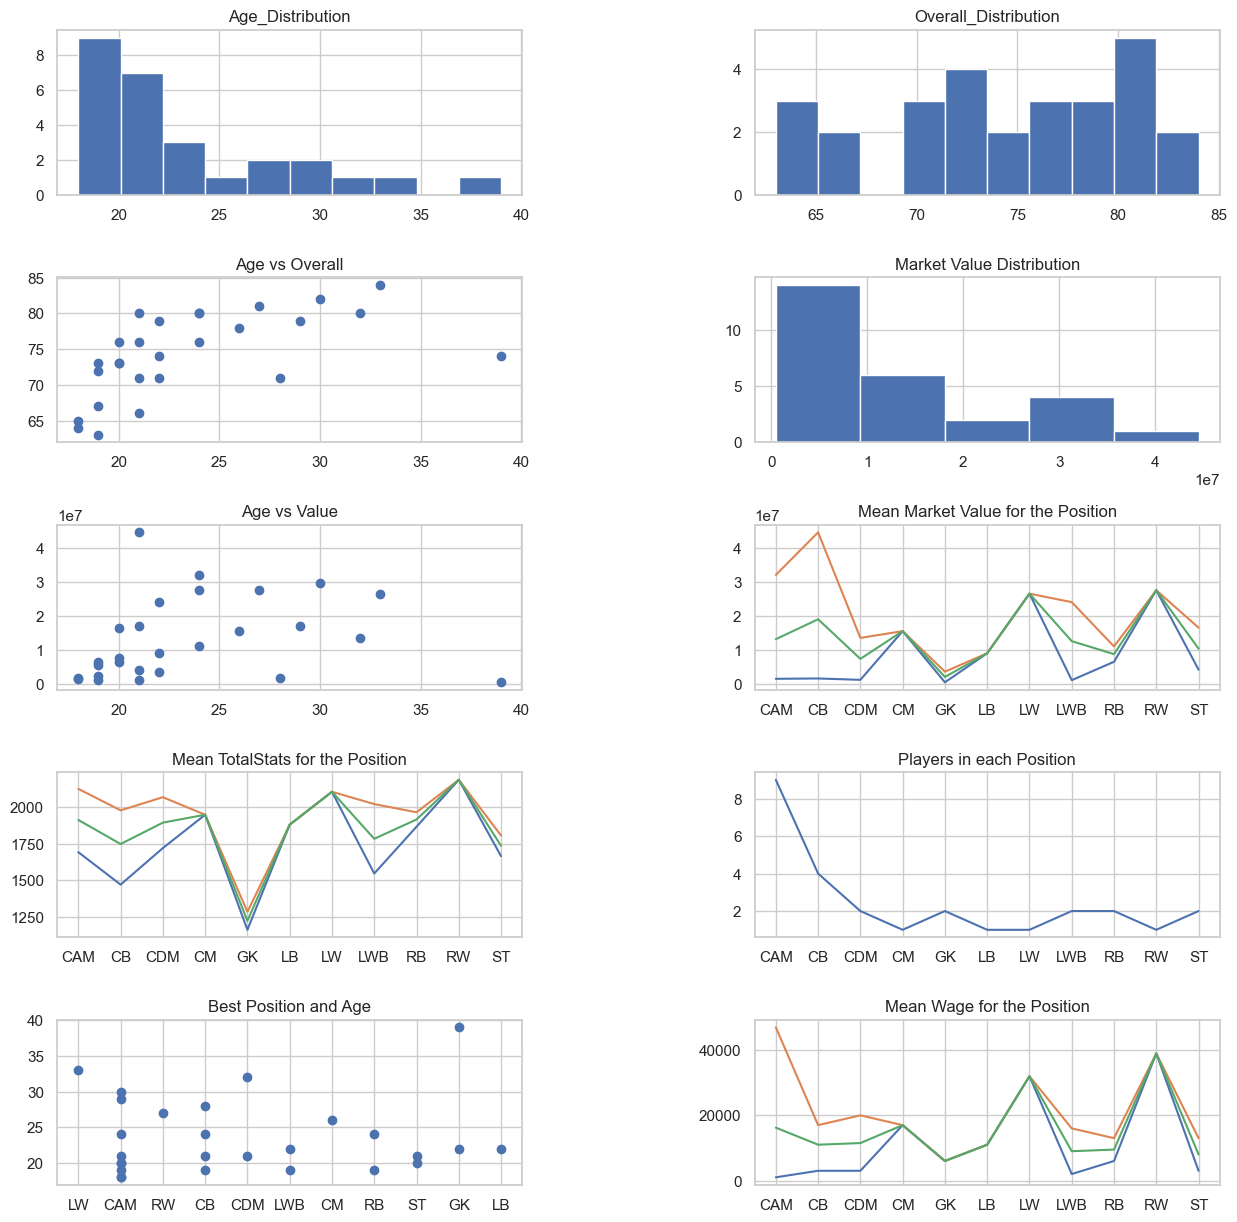

In [61]:
f, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5) 

ax[0,0].hist(ajax['Age'], bins=10)
ax[0,0].set_title('Age_Distribution')

ax[0,1].hist(ajax['Overall'], bins=10)
ax[0,1].set_title('Overall_Distribution')

ax[1,0].scatter(ajax['Age'], ajax['Overall'])
ax[1,0].set_title('Age vs Overall')

ax[1,1].hist(ajax['Value(in_Euro)'], bins=5)
ax[1,1].set_title('Market Value Distribution')

ax[2,0].scatter(ajax['Age'], ajax['Value(in_Euro)'])
ax[2,0].set_title('Age vs Value')

ax[2,1].plot(ajax.groupby('Best_Position').agg({'Value(in_Euro)': ['min', 'max', 'mean']}))
ax[2,1].set_title('Mean Market Value for the Position')

ax[3,0].plot(ajax.groupby('Best_Position').agg({'TotalStats': ['min', 'max', 'mean']}))
ax[3,0].set_title('Mean TotalStats for the Position')

ax[3,1].plot(ajax.groupby('Best_Position').agg({'Known_As': 'count'}))
ax[3,1].set_title('Players in each Position')

ax[4,0].scatter(ajax['Best_Position'], ajax['Age'])
ax[4,0].set_title('Best Position and Age')

ax[4,1].plot(ajax.groupby('Best_Position').agg({'Wage(in_Euro)': ['min', 'max', 'mean']}))
ax[4,1].set_title('Mean Wage for the Position')
plt.show()

#### Some Findings based on the above charts

- Overall, it is a very young team with mean age of 23
- There is big disparity in terms of players that are best for certain positions, for example, big group of players are there for CAM, where as other positions like CM or LW and RW just have single player that is good in that position.
- The GoalKeeper of the team is at the highest age group, and the team needs to think about a third goal keeper to ensure there is enough redundancy in case of current GK retires
- There is a player in the team, that has double market value than others
- Some players in CAM position are being paid way highers than others on the same position (or the rest of the team)

In [64]:
ajax[ajax['Position_Category'] == 'Defense'][['Overall', 'Age', 'Wage(in_Euro)']].head()

,Overall,Age,Wage(in_Euro)
396,80,24,17000
405,80,21,14000
593,79,22,16000
1089,76,24,13000
2289,74,22,11000


Based on above data, our desired age limiting factor could be a defender that is between 17 to 22 years old. This will ensure we can have a talented defender which can be inside the team for the years to come, in case some of our players leave the temas or get the age of 30 year old.

In [65]:
desired_defender = fifa2[(fifa2['Age'] >= 17) & (fifa2['Age'] <= 22) & (fifa2['Position_Category'] == 'Defense')]
desired_defender.shape

(1871, 90)

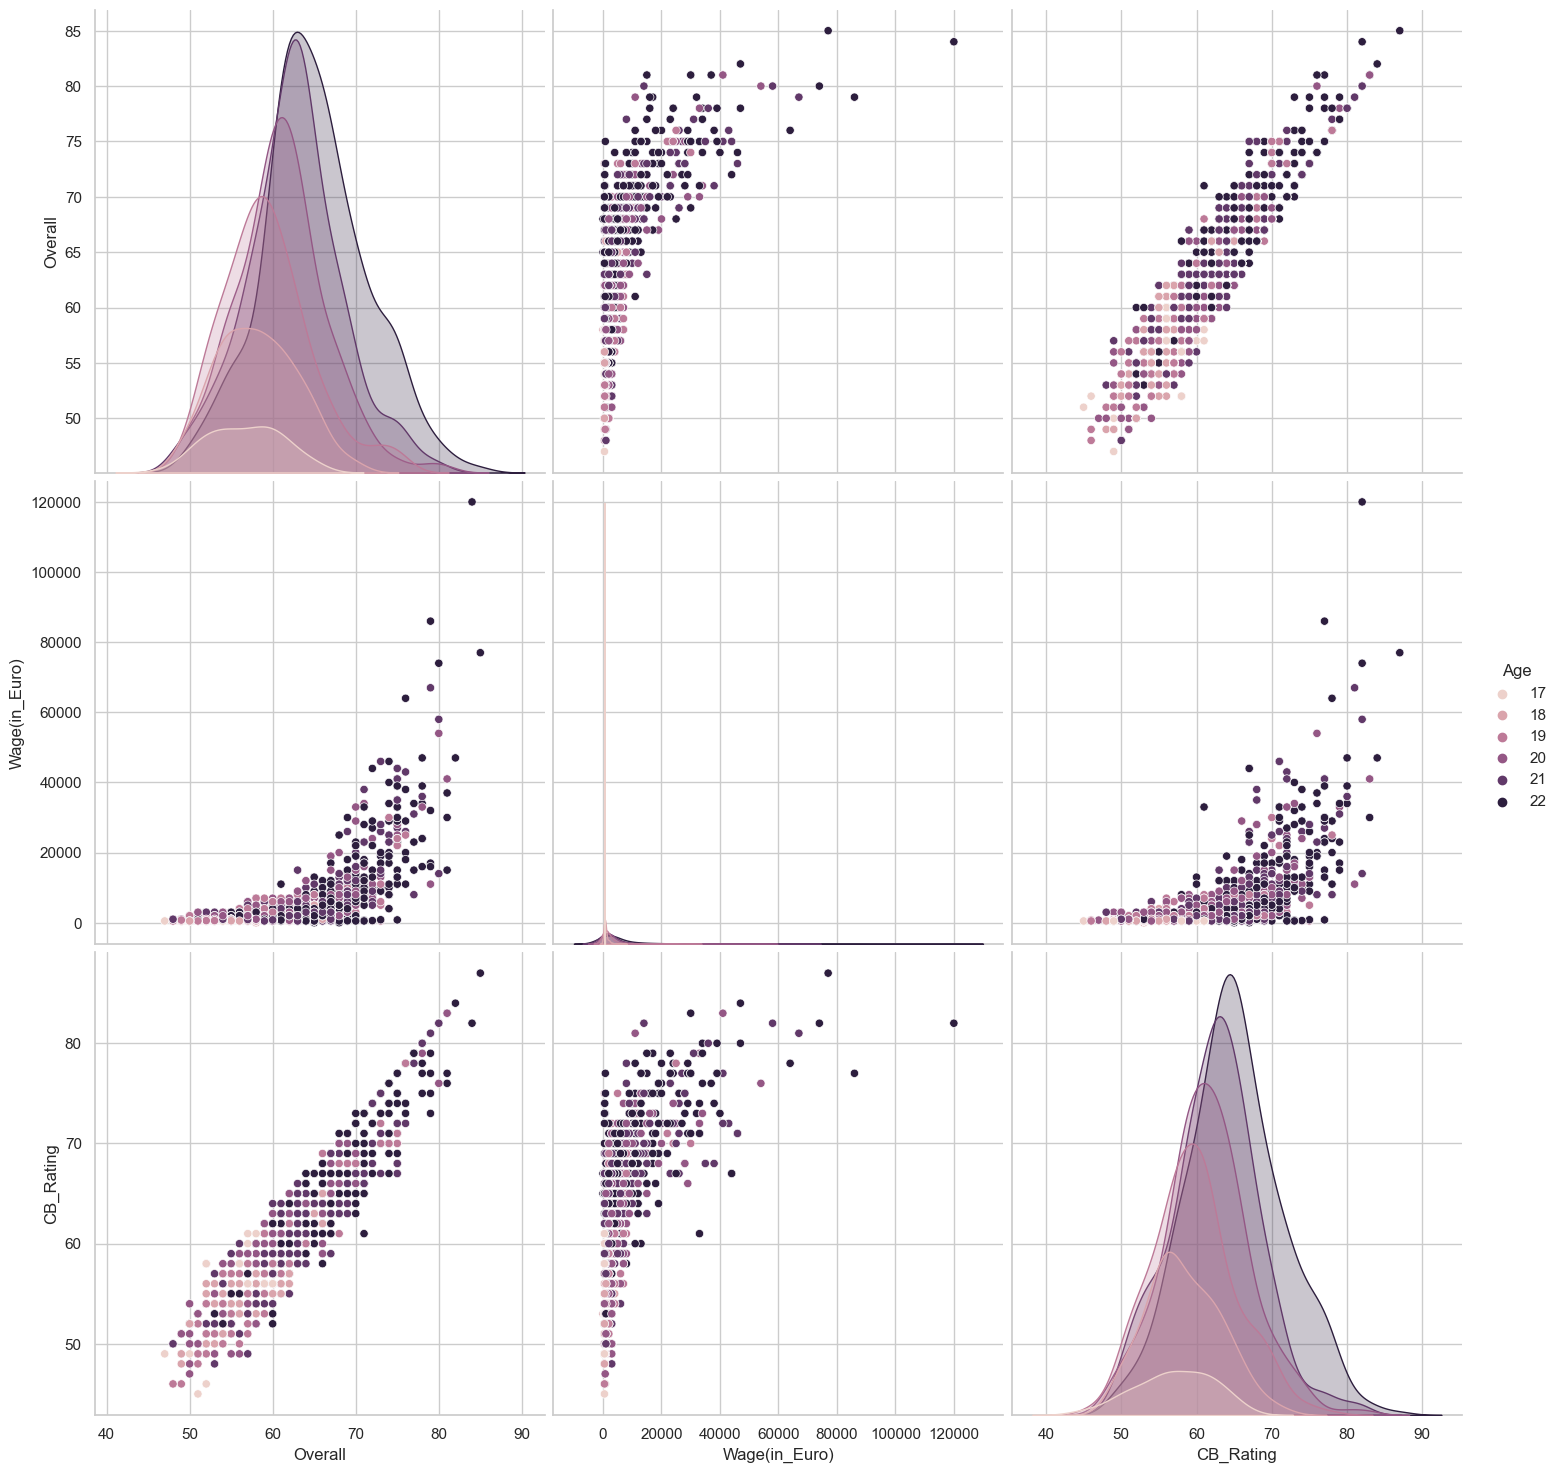

In [68]:
sns.pairplot(desired_defender[['Age','Overall', 'Wage(in_Euro)','CB_Rating']],hue='Age',height=5)


### Looking at wage factor

To reduce the list of defenders, we need to check what is the affordable wage we can pay. Current defenders are having a wage around 15K.

In [70]:
ajax['Wage(in_Euro)'].mean()

13962.962962962964

In [71]:
# We limit our Defender group to have wage below 15K
desired_defender = desired_defender[desired_defender['Wage(in_Euro)']<15000]
desired_defender.shape


(1743, 90)

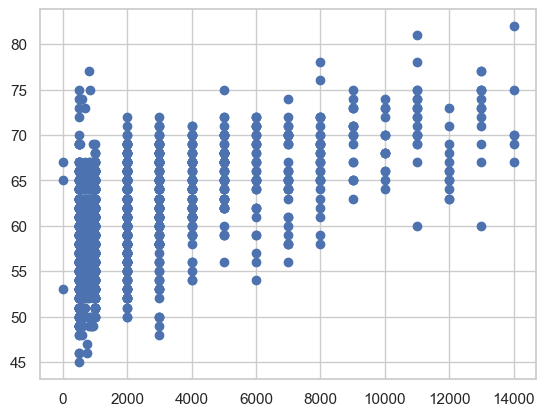

In [72]:
plt.scatter(desired_defender['Wage(in_Euro)'], desired_defender['CB_Rating'])
plt.show()

In [74]:
desired_defender.head(10)

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,Height(in_cm),Weight(in_kg),TotalStats,BaseStats,Club_Name,Wage(in_Euro),Release_Clause,Club_Position,Contract_Until,Club_Jersey_Number,Joined_On,On_Loan,Preferred_Foot,Weak_Foot_Rating,Skill_Moves,International_Reputation,National_Team_Name,National_Team_Image_Link,National_Team_Position,National_Team_Jersey_Number,Attacking_Work_Rate,Defensive_Work_Rate,Pace_Total,Shooting_Total,Passing_Total,Dribbling_Total,Defending_Total,Physicality_Total,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,LongPassing,BallControl,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,ST_Rating,LW_Rating,LF_Rating,CF_Rating,RF_Rating,RW_Rating,CAM_Rating,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating,Position_Category
405,J. Timber,Jurriën Timber,80,88,44500000,"CB,RB",CB,Netherlands,https://cdn.sofifa.net/players/251/805/23_60.png,21,179,77,1950,435,Ajax,14000,71200000,CB,2025,2,2019,-,Right,3,3,2,Netherlands,https://cdn.sofifa.net/flags/nl.png,SUB,2,High,Medium,82,47,67,77,81,81,60,41,71,80,41,76,44,31,70,78,80,83,73,78,74,58,85,81,82,46,76,82,63,64,42,85,83,83,77,6,6,8,14,14,67,69,69,69,69,69,72,74,75,74,80,81,80,80,82,80,19,Defense
533,Gonçalo Inácio,Gonçalo Bernardo Inácio,79,88,36000000,CB,CB,Portugal,https://cdn.sofifa.net/players/257/179/23_60.png,20,185,78,1773,395,Sporting CP,11000,79200000,CB,2026,25,2019,-,Left,2,2,1,-,https://cdn.sofifa.net/flags/pt.png,-,-,Medium,High,80,36,61,61,80,77,30,23,77,78,45,49,29,27,76,73,78,81,65,77,55,67,72,76,78,28,77,78,48,68,40,75,81,82,79,6,6,7,10,7,60,57,60,60,60,57,65,64,71,64,73,79,73,76,81,76,17,Defense
1010,L. Geertruida,Lutsharel Geertruida,77,85,22500000,"RB,CB",CB,Netherlands,https://cdn.sofifa.net/players/241/187/23_60.png,21,185,73,1931,426,Feyenoord,8000,38300000,RB,2024,4,2017,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/nl.png,-,-,Medium,Medium,80,52,68,73,76,77,70,61,80,74,31,72,56,30,68,75,79,80,75,69,72,49,89,78,78,42,70,72,64,68,40,75,74,79,78,12,11,13,12,10,69,70,68,68,68,70,71,74,72,74,77,76,77,77,78,77,20,Defense
1309,David Carmo,David Mota Teixeira Carmo,76,85,15500000,CB,CB,Portugal,https://cdn.sofifa.net/players/251/616/23_60.png,22,196,89,1501,338,FC Porto,11000,34100000,SUB,2027,4,2022,-,Left,2,2,1,-,https://cdn.sofifa.net/flags/pt.png,-,-,Medium,Medium,50,28,53,51,77,79,29,23,73,69,28,45,33,25,68,62,51,50,35,73,32,42,32,62,92,23,80,77,22,50,38,70,78,79,75,10,7,9,14,15,50,46,47,47,47,46,52,52,61,52,65,74,65,68,78,68,20,Defense
1507,N. Pérez,Nehuén Pérez,75,82,10500000,CB,CB,Argentina,https://cdn.sofifa.net/players/244/206/23_60.png,22,186,75,1522,331,Udinese Calcio,13000,20000000,CB,2027,18,2022,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/ar.png,-,-,Medium,High,57,25,47,51,77,74,21,21,74,69,22,39,21,32,60,61,60,55,48,75,55,42,77,69,75,16,79,77,26,36,40,70,77,78,77,9,8,8,9,6,49,44,46,46,46,44,50,51,58,51,66,72,66,69,77,69,17,Defense
1649,J. Šutalo,Josip Šutalo,75,84,12000000,CB,CB,Croatia,https://cdn.sofifa.net/players/256/325/23_60.png,22,190,82,1694,385,Dinamo Zagreb,800,28800000,CB,2028,37,2018,-,Right,3,2,1,Croatia,https://cdn.sofifa.net/flags/hr.png,SUB,5,Medium,High,78,29,58,67,76,77,43,24,72,73,26,63,29,22,68,73,79,77,62,77,51,41,80,73,81,26,70,74,34,53,39,79,78,75,76,8,15,7,11,14,56,58,57,57,57,58,62,64,66,64,73,75,73,74,77,74,21,Defense
1695,Davi Parrela,Davi Alexandre Parrela Ferreira,75,75,6000000,"CB,CDM",CB,Brazil,https://cdn.sofifa.net/players/230/388/23_60.png,22,191,88,1651,364,Atlético Clube Goianiense,11000,11400000,CB,2025,4,2022,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/br.png,-,-,Medium,Medium,64,40,5

In [75]:
desired_defender.sort_values("Release_Clause").head()

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,Height(in_cm),Weight(in_kg),TotalStats,BaseStats,Club_Name,Wage(in_Euro),Release_Clause,Club_Position,Contract_Until,Club_Jersey_Number,Joined_On,On_Loan,Preferred_Foot,Weak_Foot_Rating,Skill_Moves,International_Reputation,National_Team_Name,National_Team_Image_Link,National_Team_Position,National_Team_Jersey_Number,Attacking_Work_Rate,Defensive_Work_Rate,Pace_Total,Shooting_Total,Passing_Total,Dribbling_Total,Defending_Total,Physicality_Total,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,LongPassing,BallControl,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,ST_Rating,LW_Rating,LF_Rating,CF_Rating,RF_Rating,RW_Rating,CAM_Rating,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating,Position_Category
14279,A. Lewis,Adam Lewis,61,65,450000,"LWB,LB",LWB,England,https://cdn.sofifa.net/players/243/056/23_60.png,22,175,63,1642,339,Newport County,11000,0,SUB,2023,27,2017,TRUE,Left,2,2,1,-,https://cdn.sofifa.net/flags/gb-eng.png,-,-,Medium,Medium,66,39,58,62,57,57,62,38,49,59,32,62,61,62,57,59,73,60,71,57,79,30,78,55,52,44,69,60,45,53,55,45,56,59,57,12,7,6,12,11,51,57,53,53,53,57,58,60,58,60,61,60,61,61,60,61,17,Defense
12811,O. Drambaev,Oleksandr Drambaev,63,71,1000000,"LB,LWB",LB,Ukraine,https://cdn.sofifa.net/players/269/699/23_60.png,21,185,76,1590,348,SV Zulte Waregem,500,0,LB,2023,5,2021,TRUE,Left,3,2,1,-,https://cdn.sofifa.net/flags/ua.png,-,-,High,Medium,72,35,58,57,59,67,60,29,52,61,25,55,49,52,55,60,70,74,64,55,59,45,63,68,67,37,65,59,55,55,32,47,57,62,60,8,7,10,5,15,53,56,54,54,54,56,57,60,59,60,63,62,63,63,62,63,16,Defense
12722,K. Kruk,Kamil Kruk,63,70,900000,CB,CB,Poland,https://cdn.sofifa.net/players/256/984/23_60.png,22,185,79,1479,324,PGE FKS Stal Mielec,2000,0,SUB,2023,74,2020,TRUE,Right,2,2,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,High,Medium,60,43,42,45,63,71,33,48,58,54,25,33,42,31,40,48,55,64,63,59,73,42,68,68,75,41,63,63,30,32,34,52,64,64,61,7,13,10,8,10,50,45,45,45,45,45,46,47,49,47,58,59,58,60,65,60,17,Defense
6059,S. Niakaté,Sikou Niakaté,69,78,2900000,"CB,LB",CB,France,https://cdn.sofifa.net/players/240/453/23_60.png,22,186,76,1605,357,SC Braga,4000,0,CB,2023,4,2018,TRUE,Left,3,2,1,-,https://cdn.sofifa.net/flags/fr.png,-,-,Medium,Medium,69,31,48,62,68,79,43,24,66,62,27,61,28,25,45,61,66,71,62,65,71,54,85,82,80,24,71,67,32,41,40,61,68,68,67,8,10,8,13,10,53,52,51,51,51,52,53,57,57,57,67,66,67,67,71,67,18,Defense
12581,M. Sorinola,Matthew Sorinola,63,72,1000000,"LWB,RWB",LWB,England,https://cdn.sofifa.net/players/252/555/23_60.png,21,173,65,1667,359,Swansea City,2000,0,RWB,2023,29,2021,TRUE,Right,4,3,1,-,https://cdn.sofifa.net/flags/gb-eng.png,-,-,Medium,Medium,74,47,60,64,57,57,64,47,50,63,32,62,59,36,62,60,75,74,83,57,75,46,61,59,59,48,49,56,56,56,44,56,58,60,58,14,14,15,10,5,57,61,58,58,58,61,62,63,61,63,63,61,63,63,59,63,18,Defense
